In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import sys
import dateutil.parser

from __future__ import print_function

In [2]:
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import dataprep

In [3]:
execfile('config.py')

## Run the preprocessing script

This part runs all steps for the preprocessing. This can also be done by calling the script `modelgen.py` directly from the commandline. Use the script:

`python modelgen.py file_path annotations_path wearcodes_path output_path`

In [66]:
#Function that we should not need anymore in the future
def remove_missing(dfs):
    dfs2 = dfs.copy()
    for k in dfs2.keys():
        for v in ['anglex', 'angley', 'anglez']:
            dfs2[k][v] = [float(a) for a in dfs2[k][v]]
    return dfs2

In [70]:
print('Process annotations...')
#annotations = dataprep.process_annotations(annotations_path)
print('Join wearcodes...')
#annotations_codes = dataprep.join_wearcodes(wearcodes_path, annotations)
print('Process data...')
#dfs = dataprep.process_data(annotations_codes, accelerometer_5sec_path)
print('Save merged...')
#dataprep.save_merged(dfs, merged_path)
dfs2 = remove_missing(dfs)
print('Take subsequences...')
subsets = dataprep.take_subsequences(dfs2)
print('Switch positions...')
subsets = dataprep.switch_positions(subsets)
print('Save subsequences...')
dataprep.save_subsequences(subsets, subset_path)

Process annotations...
Join wearcodes...
Process data...
Save merged...
Take subsequences...
Switch positions...
switched dataset with median 43.573060
switched dataset with median 33.749245
switched dataset with median 45.795665
switched dataset with median 12.563923
switched dataset with median 34.403080
switched dataset with median 49.159638
switched dataset with median 38.703571
switched dataset with median 29.002829
switched dataset with median 39.731639
switched dataset with median 34.325970
switched dataset with median 29.855654
switched dataset with median 36.191689
switched dataset with median 27.332665
switched dataset with median 30.580422
switched dataset with median 9.299270
switched dataset with median 1.653267
switched dataset with median 64.579593
switched dataset with median 37.897403
switched dataset with median 4.838247
switched dataset with median 25.993250
switched dataset with median 4.770050
switched dataset with median 4.127491
switched dataset with median 36.65

## Investigate annotations

In [71]:
print(annotations.shape)
annotations.head()

(46368, 7)


,serflag,tud_day,Slot,start_time,end_time,act,act_label
0,101390011_100,1,1,2015-02-15 04:00:00+00:00,2015-02-15 04:10:00+00:00,1.0,Sleeping and resting (including sick in bed)
1,101390011_100,1,2,2015-02-15 04:10:00+00:00,2015-02-15 04:20:00+00:00,1.0,Sleeping and resting (including sick in bed)
2,101390011_100,1,3,2015-02-15 04:20:00+00:00,2015-02-15 04:30:00+00:00,1.0,Sleeping and resting (including sick in bed)
3,101390011_100,1,4,2015-02-15 04:30:00+00:00,2015-02-15 04:40:00+00:00,1.0,Sleeping and resting (including sick in bed)
4,101390011_100,1,5,2015-02-15 04:40:00+00:00,2015-02-15 04:50:00+00:00,1.0,Sleeping and resting (including sick in bed)


In [72]:
# To check: Do we have any gaps?
for i in range(1, annotations.shape[0]):
    if annotations['serflag'][i]==annotations['serflag'][i-1] and annotations['tud_day'][i]==annotations['tud_day'][i-1]:
        if (annotations['end_time'][i-1] != annotations['start_time'][i]):
            print(annotations.loc[[i-1, i],['start_time', 'end_time']])
            print(annotations['end_time'][i-1] - annotations['start_time'][i])

## Investigate join with wearcodes

In [73]:
print(annotations_codes.shape)
annotations_codes.head()

(46368, 14)


,serflag,tud_day,Slot,start_time,end_time,act,act_label,Monitor,Day1,Day2,binFile,fileSize,day1Ready,day2Ready
0,101390011_100,1,1,2015-02-15 04:00:00+00:00,2015-02-15 04:10:00+00:00,1.0,Sleeping and resting (including sick in bed),21563,2015-02-15,2015-02-20,__021563_2015-03-06 09-56-08.bin,791586540,True,True
1,101390011_100,1,2,2015-02-15 04:10:00+00:00,2015-02-15 04:20:00+00:00,1.0,Sleeping and resting (including sick in bed),21563,2015-02-15,2015-02-20,__021563_2015-03-06 09-56-08.bin,791586540,True,True
2,101390011_100,1,3,2015-02-15 04:20:00+00:00,2015-02-15 04:30:00+00:00,1.0,Sleeping and resting (including sick in bed),21563,2015-02-15,2015-02-20,__021563_2015-03-06 09-56-08.bin,791586540,True,True
3,101390011_100,1,4,2015-02-15 04:30:00+00:00,2015-02-15 04:40:00+00:00,1.0,Sleeping and resting (including sick in bed),21563,2015-02-15,2015-02-20,__021563_2015-03-06 09-56-08.bin,791586540,True,True
4,101390011_100,1,5,2015-02-15 04:40:00+00:00,2015-02-15 04:50:00+00:00,1.0,Sleeping and resting (including sick in bed),21563,2015-02-15,2015-02-20,__021563_2015-03-06 09-56-08.bin,791586540,True,True


## Investigate accelerometer data

In [74]:
example_key = dfs.keys()[0]
binfile, day = example_key
df = dfs[example_key]
df.head()

,acceleration,anglex,angley,anglez,invalid,filename,Slot,act,act_label,start_time,subset
timestamp,,,,,,,,,,,
2015-03-01 04:00:00,0.001623,-59.217822,-22.151974,-20.244494,0,__021900_2015-03-13 12-48-19.bin_day2,1,1.0,Sleeping and resting (including sick in bed),2015-03-04 04:00:00+00:00,0
2015-03-01 04:00:05,0.001595,-59.291495,-22.169837,-20.125454,0,__021900_2015-03-13 12-48-19.bin_day2,1,1.0,Sleeping and resting (including sick in bed),2015-03-04 04:00:00+00:00,0
2015-03-01 04:00:10,0.001834,-59.291495,-22.169837,-20.125454,0,__021900_2015-03-13 12-48-19.bin_day2,1,1.0,Sleeping and resting (including sick in bed),2015-03-04 04:00:00+00:00,0
2015-03-01 04:00:15,0.001524,-59.292950,-22.167712,-20.125770,0,__021900_2015-03-13 12-48-19.bin_day2,1,1.0,Sleeping and resting (including sick in bed),2015-03-04 04:00:00+00:00,0
2015-03-01 04:00:20,0.001698,-59.271761,-22.165052,-20.157339,0,__021900_2015-03-13 12-48-19.bin_day2,1,1.0,Sleeping and resting (including sick in bed),2015-03-04 04:00:00+00:00,0


In [75]:
t = df.index[0]
print(t.tz)

None


## Investigate subsequences

-37.0242099463 -8.77247660327
-43.5730603836 -0.579688811956
-20.9957599362 -11.1805627539
-33.7492447661 12.0441873197
-27.4639795608 -1.73597109838
-45.7956645821 -0.24151180537
-12.5639231484 11.9955397853
-40.4328712314 1.17037653247
-51.3167096185 4.18798996751
-36.4772181136 -51.9636690188
-38.8097045154 9.81671306363
-36.4929247389 -11.5152693618
-9.37802445505 -10.9571960435
-25.5764831847 -1.75755832344
-14.9539071996 -0.27030299664


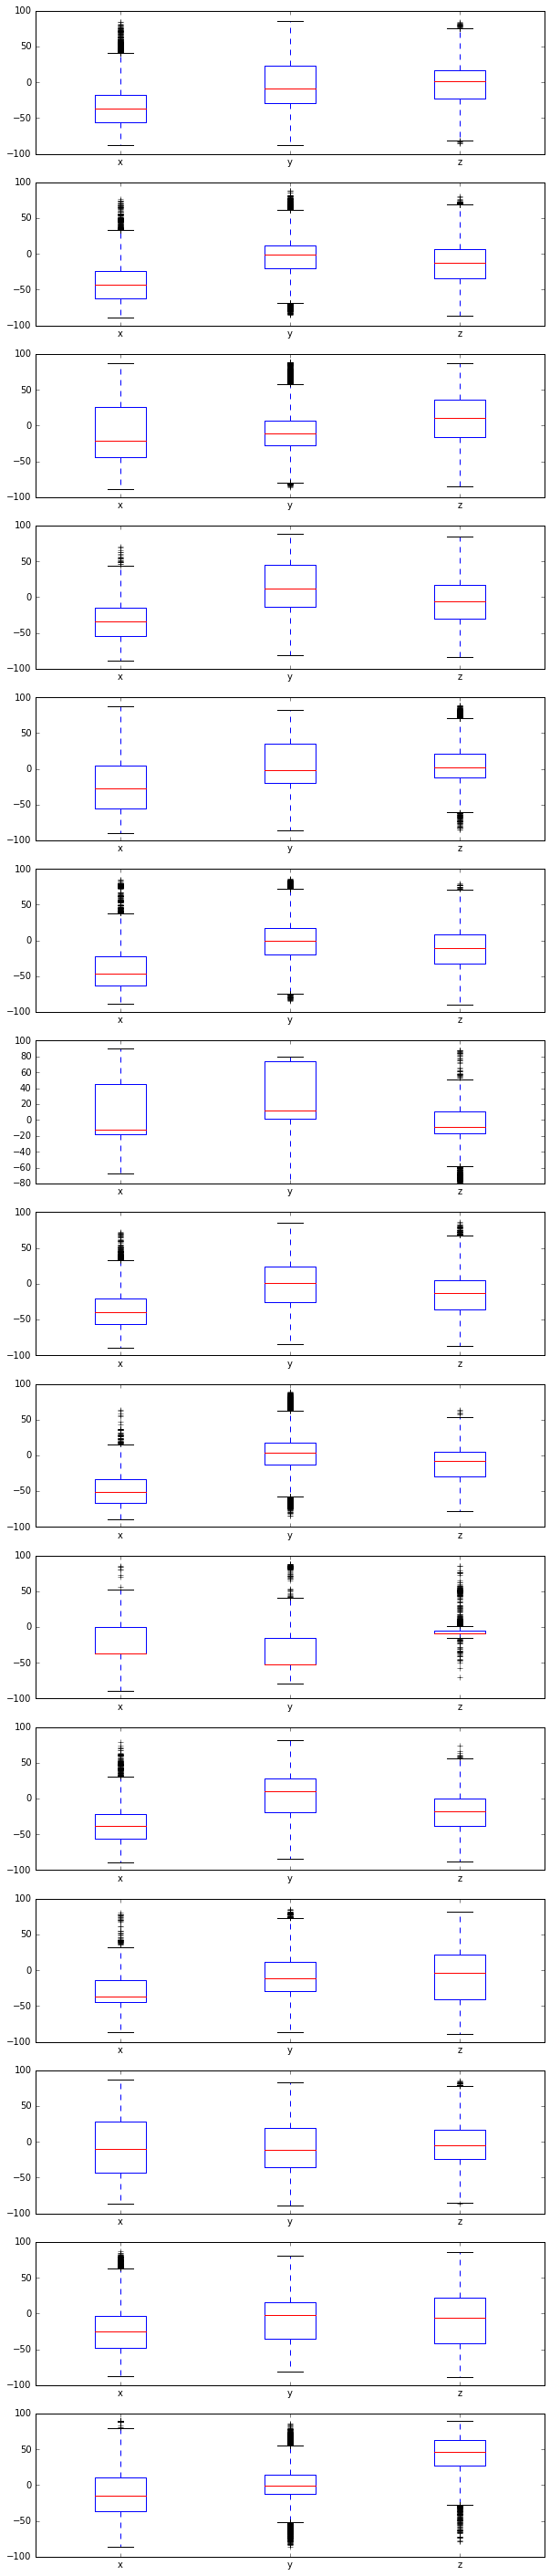

In [78]:
#Create boxplots for each sequence for the angles
#We expect x (and thus anglex) to be distributed either mostly on the negative or mostly on the positive half
maxplotsnr = 15
plotsets = subsets.values()[:maxplotsnr]
fig, axes = plt.subplots(maxplotsnr, figsize=(10, 50))
for i, dataset in enumerate(plotsets):
    non_sleeping_indices = dataset['act'] != 1.0
    non_sleeping = dataset[non_sleeping_indices]
    print(np.median(non_sleeping['anglex']), np.median(non_sleeping['angley']))
    axes[i].boxplot([non_sleeping['anglex'], non_sleeping['angley'], non_sleeping['anglez']], labels=['x', 'y', 'z']);